In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [21]:
diabetes_df = pd.read_csv('diabetes_updated.csv')
diabetes_df.head(15)

print(diabetes_df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


<Axes: >

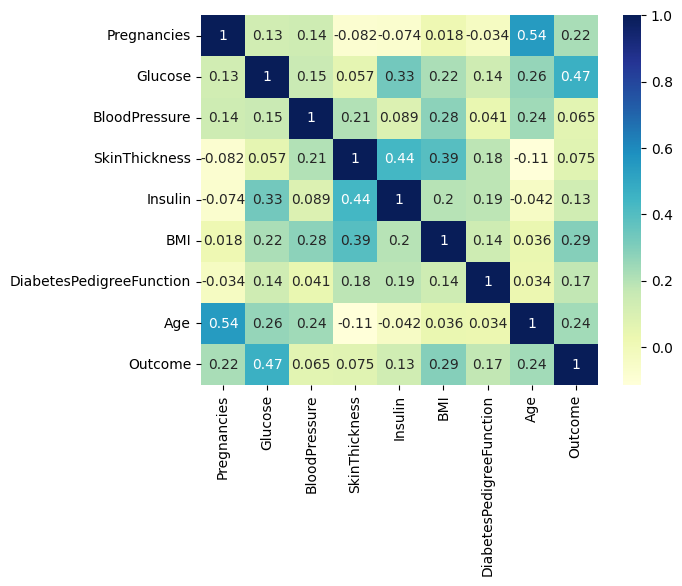

In [22]:
sns.heatmap(diabetes_df.corr(), annot=True, cmap='YlGnBu')
# Identify any relationships that show low or no corelation. 

In [23]:

# Filter rows that contain at least one zero value in column 
rows_with_zeros = diabetes_df[(diabetes_df[['SkinThickness', 'BloodPressure']] == 0).any(axis=1)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(rows_with_zeros)

# Insulin directly linked to diabetes. Blood pressure associated, Skin thickness not.
skin_thickness_zero = (diabetes_df['SkinThickness'] == 0).sum()
blood_pressure_zero = (diabetes_df['BloodPressure'] == 0).sum()
print ('The number of rows where skin thickness = 0 is:', skin_thickness_zero)
print ('The number of rows where blood pressure = 0 is:', blood_pressure_zero)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
15             7      100              0              0        0  30.0   
17             7      107             74              0        0  29.6   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
26             7      147             76              0        0  39.4   
29             5      117             

In [24]:
# 227 - 0 skin thickness values. Will drop.
diabetes_df = diabetes_df.drop('SkinThickness', axis = 1)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [25]:
X = diabetes_df.drop(columns=['Outcome']) # Include all data other than Outcome.
y = diabetes_df['Outcome'] # Target 
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

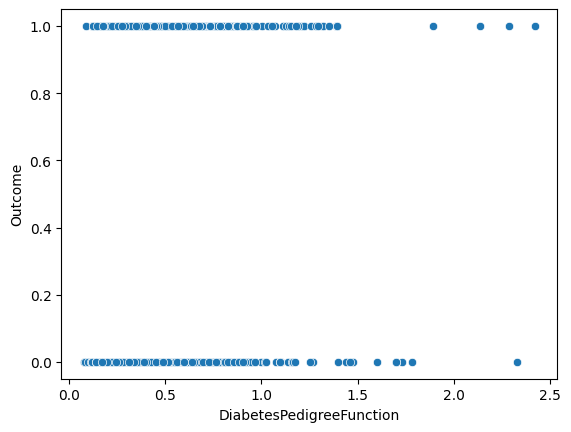

In [26]:
# Test of data.
sns.scatterplot(data = X, x = X['DiabetesPedigreeFunction'], y = y)

In [ ]:
# Automate plot creation for remaining data in dataframe. 
for col in X.columns:
    sns.scatterplot(data = X, x = col, y = y)

    plt.tight_layout()
    plt.show()

In [ ]:
sns.pairplot(data=diabetes_df.drop('Age', axis=1))


The y label 'Outcome' is binary (1 or 0). Many of the representations in the pairplot don't show 'Outcome' as variable that can be suitably analysed as a linear regression. In the remainder of this work I will show the process I have undertaken in the process of creating a supervised training environment for the data that has been provided in the instructions for this task. 

In [ ]:
# All features are continuous data but do not follow a gausian distribution - use MinMaxScaler. 
min_max = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 
'DiabetesPedigreeFunction', 'Age']

X_train_scaled = min_max.fit_transform(X_train[features])
X_test_scaled = min_max.transform(X_test[features])

X_train.loc[:, features] = X_train_scaled
X_test.loc[:, features] = X_test_scaled

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)
# Compariosn of the prediction (y_pred) against test set (y_test)

Prediction of the data doesn't show much. The binary nature of data means that true values are decimal figures between 1 and 0, which makes little sense. Data needs to be continuous. 

In [36]:
print('Intercept: \n', linear_reg.intercept_)
print('Coefficients: \n', linear_reg.coef_)

Intercept: 
 -0.8041515901338767
Coefficients: 
 [ 0.17921004  1.11166731 -0.27184943 -0.21068936  1.03052157  0.26590924
  0.38204659]


In [41]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error: \n", mse)
print("R-squared: \n ", r_squared)


Mean Squared Error: 
 0.17069237963360154
R-squared: 
  0.2565398575958687


MSE - Fairly low. Shows predictions from teh model are closer to the actual values. 
R2 - Closer to 0 than 1. Would indicate that the variability in dependent vairable is not too different from just using mean. Use of Binary data not useful in this case.
